In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
folder = 'C:/Users/user/Downloads/Datasets'
raw_data_1 = pd.read_csv(folder +'/2000-01.csv')
raw_data_2 = pd.read_csv(folder +'/2001-02.csv')
raw_data_3 = pd.read_csv(folder +'/2002-03.csv')
raw_data_4 = pd.read_csv(folder +'/2003-04.csv')
raw_data_5 = pd.read_csv(folder +'/2004-05.csv')
raw_data_6 = pd.read_csv(folder +'/2005-06.csv')
raw_data_7 = pd.read_csv(folder +'/2006-07.csv')
raw_data_8 = pd.read_csv(folder +'/2007-08.csv')
raw_data_9 = pd.read_csv(folder +'/2008-09.csv')
raw_data_10 = pd.read_csv(folder +'/2009-10.csv')
raw_data_11 = pd.read_csv(folder +'/2010-11.csv')
raw_data_12 = pd.read_csv(folder +'/2011-12.csv')
raw_data_13 = pd.read_csv(folder +'/2012-13.csv')
raw_data_14 = pd.read_csv(folder +'/2013-14.csv')
raw_data_15 = pd.read_csv(folder +'/2014-15.csv')
raw_data_16 = pd.read_csv(folder +'/2015-16.csv')
raw_data_17 = pd.read_csv(folder +'/2016-17.csv')
raw_data_18 = pd.read_csv(folder +'/2017-18.csv')

In [3]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

In [4]:
playing_statistics_1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,19/08/00,Charlton,Man City,4,0,H
1,19/08/00,Chelsea,West Ham,4,2,H
2,19/08/00,Coventry,Middlesbrough,1,3,A
3,19/08/00,Derby,Southampton,2,2,D
4,19/08/00,Leeds,Everton,2,0,H


In [5]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

In [6]:
# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

In [7]:
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
# + 1: The code uses i + 1 instead of i to make the index 1-based instead of 0-based. So, i + 1 will range from 1 to 380.
# % 10: The modulus operator (%) is used to find the remainder when i + 1 is divided by 10.
# This means that every 10th match (i + 1 equals 10, 20, 30, ...) will cause the condition to be True.
# Condition == 0:
# The condition checks if (i + 1) % 10 is equal to 0, which only happens at the end of every 10 matches.        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

In [8]:
# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)

C:\Users\user\AppData\Local\Temp\ipykernel_1528\1877547295.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\1877547295.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\1877547295.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [9]:
playing_statistics_1.head(25)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0
5,19/08/00,Leicester,Aston Villa,0,0,D,0,0,0,0
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,0,0
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,0,0
8,19/08/00,Tottenham,Ipswich,3,1,H,0,0,0,0
9,20/08/00,Man United,Newcastle,2,0,H,0,0,0,0


In [10]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points

In [11]:
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

In [12]:
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [13]:
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)

C:\Users\user\AppData\Local\Temp\ipykernel_1528\3688462924.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2338922749.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2338922749.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
C:\Users\user\AppData\Local\Temp\ipyke

In [14]:
playing_statistics_1.head(25)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0,0
5,19/08/00,Leicester,Aston Villa,0,0,D,0,0,0,0,0,0
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,0,0,0,0
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,0,0,0,0
8,19/08/00,Tottenham,Ipswich,3,1,H,0,0,0,0,0,0
9,20/08/00,Man United,Newcastle,2,0,H,0,0,0,0,0,0


In [15]:
def get_form(playing_stat, num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num, 39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

In [16]:
def add_form(playing_stat, num):
    form = get_form(playing_stat, num)  # Get the form for each team
    h = ['M' for i in range(num * 10)]  # Initialize list for home team forms, starting with 'M' (missing)
    a = ['M' for i in range(num * 10)]  # Initialize list for away team forms, starting with 'M' (missing)
    
    j = num  # Start at week `num`
    for i in range((num * 10), 380):  # Iterate from the week `num * 10` to 380
        ht = playing_stat.iloc[i].HomeTeam  # Get the home team for the current match
        at = playing_stat.iloc[i].AwayTeam  # Get the away team for the current match
        
        # Retrieve the form for the home team
        past = form.loc[ht][j]  # Get the form for the home team up to week `j`
        h.append(past[num-1])  # Append the most recent result (index `num-1`) to the list `h`
        
        # Retrieve the form for the away team
        past = form.loc[at][j]  # Get the form for the away team up to week `j`
        a.append(past[num-1])  # Append the most recent result (index `num-1`) to the list `a`
        
        if ((i + 1) % 10) == 0:  # Check if the current week is the end of a match week block
            j = j + 1  # Move to the next set of weeks

    playing_stat['HM' + str(num)] = h  # Add the home team form to the DataFrame
    playing_stat['AM' + str(num)] = a  # Add the away team form to the DataFrame

    return playing_stat
    

In [17]:
def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics

In [18]:
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)


C:\Users\user\AppData\Local\Temp\ipykernel_1528\2269280032.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h  # Add the home team form to the DataFrame
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2269280032.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a  # Add the away team form to the DataFrame
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2269280032.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [19]:
playing_statistics_1.head(25)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
5,19/08/00,Leicester,Aston Villa,0,0,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
8,19/08/00,Tottenham,Ipswich,3,1,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
9,20/08/00,Man United,Newcastle,2,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M


In [20]:
playing_statistics_1.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'AM1', 'HM2', 'AM2', 'HM3', 'AM3',
       'HM4', 'AM4', 'HM5', 'AM5'],
      dtype='object')

In [21]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]

In [22]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)

In [23]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18
                          ], ignore_index=True)

In [24]:
# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)


In [25]:
# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [26]:
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

In [27]:
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [28]:
playing_stat['MW']

0        1
1        1
2        1
3        1
4        1
        ..
6835    38
6836    38
6837    38
6838    38
6839    38
Name: MW, Length: 6840, dtype: int64

In [29]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [30]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
#playing_stat_test = playing_stat[5700:]
#saving the final dataset
playing_stat.to_csv('final_dataset.csv')
#saving the test set
#playing_stat_test.to_csv("test_set.csv")
#loading the final dataset
dataset = pd.read_csv('final_dataset.csv', index_col=False)
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


<Axes: >

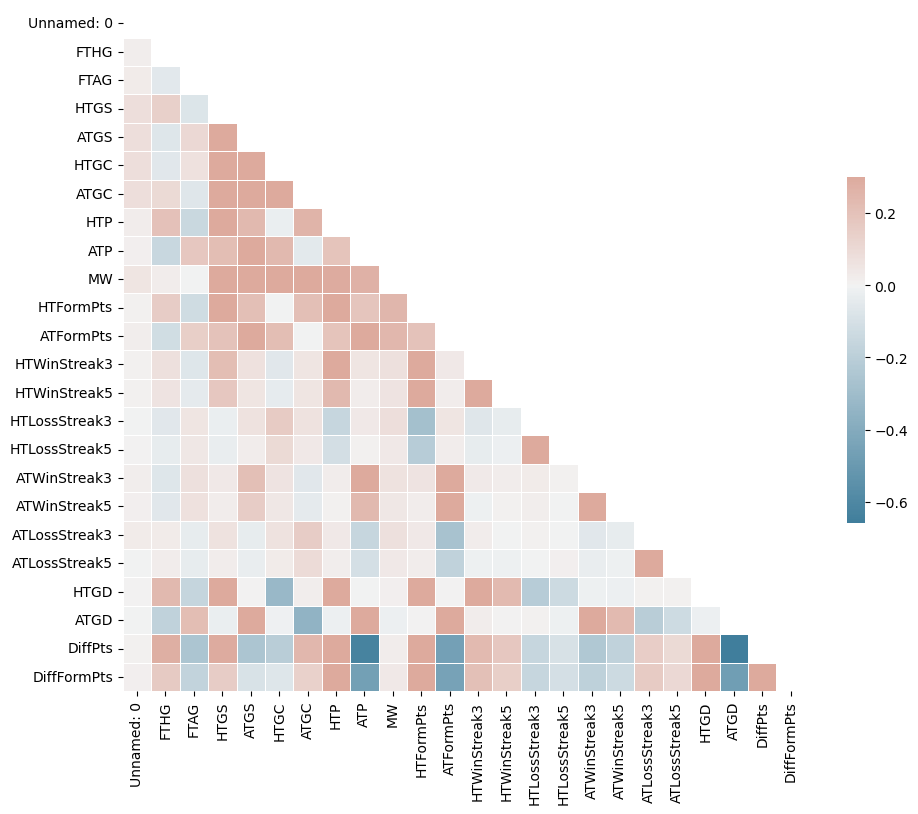

In [31]:
corr = dataset.corr(numeric_only=True)

mask= np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20,  as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [32]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

In [33]:
dataset2 = dataset.copy().drop(columns =['Date',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'] )

In [34]:
dataset2.head()


,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM3,AM1,AM2,AM3,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Charlton,Man City,4,0,H,0,0,0,0,...,M,M,M,M,0,0,0.0,0.0,0.0,0.0
1,1,Chelsea,West Ham,4,2,H,0,0,0,0,...,M,M,M,M,0,0,0.0,0.0,0.0,0.0
2,2,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,M,M,M,M,0,0,0.0,0.0,0.0,0.0
3,3,Derby,Southampton,2,2,NH,0,0,0,0,...,M,M,M,M,0,0,0.0,0.0,0.0,0.0
4,4,Leeds,Everton,2,0,H,0,0,0,0,...,M,M,M,M,0,0,0.0,0.0,0.0,0.0


In [35]:
dataset2.drop(columns =['HM1','HM2','HM3', 'AM1', 'AM2','AM3'], inplace= True )

In [36]:
dataset2

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Charlton,Man City,4,0,H,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
1,1,Chelsea,West Ham,4,2,H,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
2,2,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
3,3,Derby,Southampton,2,2,NH,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
4,4,Leeds,Everton,2,0,H,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,Newcastle,Chelsea,3,0,H,36,62,47,35,1.078947,1.842105,3,13,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,Southampton,Man City,0,1,NH,37,105,55,27,0.947368,2.552632,8,13,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,Swansea,Stoke,1,2,NH,27,33,54,67,0.868421,0.789474,1,3,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,Tottenham,Leicester,5,4,H,69,52,32,55,1.947368,1.236842,7,4,0.973684,-0.078947,0.710526,0.078947


In [37]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 17
Number of matches won by home team: 3176
Win rate of home team: 46.43%


In [38]:
X_all = dataset2.drop('FTR',axis=1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = ['HTGD','ATGD','HTP','ATP']
for col in cols:
    X_all[col] = scale(X_all[col])

In [39]:
X_all

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Charlton,Man City,4,0,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
1,1,Chelsea,West Ham,4,2,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
2,2,Coventry,Middlesbrough,1,3,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
3,3,Derby,Southampton,2,2,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
4,4,Leeds,Everton,2,0,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,Newcastle,Chelsea,3,0,36,62,47,35,-0.245340,1.176242,3,13,-0.403413,1.004475,-0.763158,-0.263158
6836,6836,Southampton,Man City,0,1,37,105,55,27,-0.493533,2.534442,8,13,-0.669021,2.941452,-1.605263,-0.131579
6837,6837,Swansea,Stoke,1,2,27,33,54,67,-0.642449,-0.835906,1,3,-1.010517,-1.312301,0.078947,-0.052632
6838,6838,Tottenham,Leicester,5,4,69,52,32,55,1.392734,0.019257,7,4,1.417901,-0.134923,0.710526,0.078947


In [40]:
y_all

0        H
1        H
2       NH
3       NH
4        H
        ..
6835     H
6836    NH
6837    NH
6838     H
6839     H
Name: FTR, Length: 6840, dtype: object

In [41]:
X_all.drop(columns = ['Unnamed: 0'], inplace=True)

In [42]:
X_all

,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,Charlton,Man City,4,0,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
1,Chelsea,West Ham,4,2,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
2,Coventry,Middlesbrough,1,3,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
3,Derby,Southampton,2,2,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
4,Leeds,Everton,2,0,0,0,0,0,-2.280523,-2.345017,0,0,0.013972,-0.020983,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Newcastle,Chelsea,3,0,36,62,47,35,-0.245340,1.176242,3,13,-0.403413,1.004475,-0.763158,-0.263158
6836,Southampton,Man City,0,1,37,105,55,27,-0.493533,2.534442,8,13,-0.669021,2.941452,-1.605263,-0.131579
6837,Swansea,Stoke,1,2,27,33,54,67,-0.642449,-0.835906,1,3,-1.010517,-1.312301,0.078947,-0.052632
6838,Tottenham,Leicester,5,4,69,52,32,55,1.392734,0.019257,7,4,1.417901,-0.134923,0.710526,0.078947


In [43]:
from sklearn.preprocessing import LabelEncoder

# Combine unique team names from both HomeTeam and AwayTeam
teams = list(X_all['HomeTeam']) + list(X_all['AwayTeam'])

# Fit the LabelEncoder on the combined list of team names
label = LabelEncoder()
label.fit(teams)

# Transform both HomeTeam and AwayTeam using the same encoder
X_all['HomeTeam'] = label.transform(X_all['HomeTeam'])
X_all['AwayTeam'] = label.transform(X_all['AwayTeam'])


In [44]:
#Center to the mean and component wise scale to unit variance.
cols = ['FTHG','FTAG','HTGS','ATGS','HTGC',	'ATGC', 'HTFormPts','ATFormPts']
for col in cols:
    X_all[col] = scale(X_all[col])

In [45]:
X_all

,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,11,24,1.905132,-1.005139,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
1,12,41,1.905132,0.773454,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
2,13,27,-0.406440,1.662751,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
3,15,34,0.364084,0.773454,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
4,21,16,0.364084,-1.005139,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,28,12,1.134608,-1.005139,0.674341,2.187585,1.372054,0.651912,-0.245340,1.176242,-0.905217,1.855585,-0.403413,1.004475,-0.763158,-0.263158
6836,34,24,-1.176964,-0.115843,0.732557,4.696975,1.859848,0.162327,-0.493533,2.534442,0.490564,1.855585,-0.669021,2.941452,-1.605263,-0.131579
6837,37,35,-0.406440,0.773454,0.150393,0.495206,1.798873,2.610253,-0.642449,-0.835906,-1.463529,-0.961711,-1.010517,-1.312301,0.078947,-0.052632
6838,38,22,2.675656,2.552048,2.595484,1.604006,0.457440,1.875875,1.392734,0.019257,0.211408,-0.679982,1.417901,-0.134923,0.710526,0.078947


In [46]:

from sklearn.preprocessing import StandardScaler

# Combine unique team names from both HomeTeam and AwayTeam
teams = np.array(list(X_all['HomeTeam']) + list(X_all['AwayTeam']))

# Reshape the teams array to 2D for fitting the scaler
teams = teams.reshape(-1, 1)

# Fit the StandardScaler on the combined list of team names
scaler = StandardScaler()
scaler.fit(teams)

# Transform both HomeTeam and AwayTeam using the fitted scaler
X_all['HomeTeam'] = scaler.transform(X_all['HomeTeam'].values.reshape(-1, 1)).flatten()
X_all['AwayTeam'] = scaler.transform(X_all['AwayTeam'].values.reshape(-1, 1)).flatten()



In [47]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
Y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
cm

array([[ 953,    0],
       [   0, 1099]], dtype=int64)

In [50]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       1.00      1.00      1.00       953
          NH       1.00      1.00      1.00      1099

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[ 952,    1],
       [   0, 1099]], dtype=int64)

In [52]:
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=700, n_jobs=-1, oob_score=True,
                       random_state=1)

In [53]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[ 949,    4],
       [   1, 1098]], dtype=int64)

In [54]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       1.00      1.00      1.00       953
          NH       1.00      1.00      1.00      1099

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume you have train_data and train_labels already defined
classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation with accuracy as the scoring metric
accuracy_scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=10)
precision_scores = cross_val_score(classifier, X_train, y_train, scoring='precision_macro', cv=10)
recall_scores = cross_val_score(classifier, X_train, y_train, scoring='recall_macro', cv=10)
f1_scores = cross_val_score(classifier, X_train, y_train, scoring='f1_macro', cv=10)

# Function to display classification metrics
def display_classification_scores(scores, metric_name):
    print(f'{metric_name} scores:', scores)
    print(f'Mean {metric_name}:', scores.mean())
    print(f'Standard deviation of {metric_name}:', scores.std())
    print()

# Display the scores for each metric
display_classification_scores(accuracy_scores, 'Accuracy')
display_classification_scores(precision_scores, 'Precision')
display_classification_scores(recall_scores, 'Recall')
display_classification_scores(f1_scores, 'F1-Score')

Accuracy scores: [0.99373695 0.99373695 0.99791232 0.99164927 0.99373695 0.99164927
 0.99791232 1.         0.9958159  0.99790795]
Mean Accuracy: 0.9954057878599942
Standard deviation of Accuracy: 0.002769098659348866

Precision scores: [0.99333333 0.99386159 0.99775785 0.99134279 0.99333333 0.9919236
 0.99776786 1.         0.99553571 0.99805447]
Mean Precision: 0.9952910538093439
Standard deviation of Precision: 0.00280584035686279

Recall scores: [0.99416342 0.99354997 0.99805447 0.99191117 0.99416342 0.99132042
 0.99804688 1.         0.99609375 0.99774775]
Mean Recall: 0.9955051255381772
Standard deviation of Recall: 0.0027638857121576655

F1-Score scores: [0.99370887 0.99370137 0.99790175 0.99160945 0.99370887 0.99160444
 0.99790296 1.         0.99579706 0.99789667]
Mean F1-Score: 0.9953831453212019
Standard deviation of F1-Score: 0.002783009353562255



In [56]:
raw_data_19 = pd.read_csv(folder +'/2018-19.csv')
raw_data_20 = pd.read_csv(folder +'/2019-20.csv')
raw_data_21 = pd.read_csv(folder +'/2020-2021.csv')
raw_data_22 = pd.read_csv(folder +'/2021-2022.csv')
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_19 = raw_data_19[columns_req]                      
playing_statistics_20 = raw_data_20[columns_req]
playing_statistics_21 = raw_data_21[columns_req]
playing_statistics_22 = raw_data_22[columns_req]

In [57]:
def process_football_data(playing_stat, num_weeks=38):
    def get_goals_scored():
        teams = {team: [] for team in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns}
        for i in range(len(playing_stat)):
            HTGS = playing_stat.iloc[i]['FTHG']
            ATGS = playing_stat.iloc[i]['FTAG']
            teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
            teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
        GoalsScored = pd.DataFrame(data=teams, index=[i for i in range(1, num_weeks + 1)]).T
        GoalsScored[0] = 0
        for i in range(2, num_weeks + 1):
            GoalsScored[i] = GoalsScored[i] + GoalsScored[i - 1]
        return GoalsScored

    def get_goals_conceded():
        teams = {team: [] for team in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns}
        for i in range(len(playing_stat)):
            ATGC = playing_stat.iloc[i]['FTHG']
            HTGC = playing_stat.iloc[i]['FTAG']
            teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
            teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
        GoalsConceded = pd.DataFrame(data=teams, index=[i for i in range(1, num_weeks + 1)]).T
        GoalsConceded[0] = 0
        for i in range(2, num_weeks + 1):
            GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i - 1]
        return GoalsConceded

    def get_gss():
        GC = get_goals_conceded()  # No argument needed
        GS = get_goals_scored()    # No argument needed
   
        j = 0
        HTGS = []
        ATGS = []
        HTGC = []
        ATGC = []

        for i in range(380):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            HTGS.append(GS.loc[ht][j])
            ATGS.append(GS.loc[at][j])
            HTGC.append(GC.loc[ht][j])
            ATGC.append(GC.loc[at][j])

            if ((i + 1) % 10) == 0:
                j += 1
        
        playing_stat['HTGS'] = HTGS
        playing_stat['ATGS'] = ATGS
        playing_stat['HTGC'] = HTGC
        playing_stat['ATGC'] = ATGC
    
        return playing_stat

    def get_points(result):
        if result == 'W':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0
    
    def get_cuml_points(matchres):
        matchres_points = matchres.applymap(get_points)
        for i in range(2, num_weeks + 1):
            matchres_points[i] = matchres_points[i] + matchres_points[i - 1]
        matchres_points.insert(column=0, loc=0, value=[0] * len(matchres_points))
        return matchres_points

    def get_matchres():
        teams = {team: [] for team in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns}
        for i in range(len(playing_stat)):
            if playing_stat.iloc[i].FTR == 'H':
                teams[playing_stat.iloc[i].HomeTeam].append('W')
                teams[playing_stat.iloc[i].AwayTeam].append('L')
            elif playing_stat.iloc[i].FTR == 'A':
                teams[playing_stat.iloc[i].AwayTeam].append('W')
                teams[playing_stat.iloc[i].HomeTeam].append('L')
            else:
                teams[playing_stat.iloc[i].HomeTeam].append('D')
                teams[playing_stat.iloc[i].AwayTeam].append('D')
        return pd.DataFrame(data=teams, index=[i for i in range(1, num_weeks + 1)]).T

    def get_agg_points():
        matchres = get_matchres()
        cum_pts = get_cuml_points(matchres)
        HTP = []
        ATP = []
        j = 0
        for i in range(len(playing_stat)):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            HTP.append(cum_pts.loc[ht][j])
            ATP.append(cum_pts.loc[at][j])
            if ((i + 1) % 10) == 0:
                j += 1
        playing_stat['HTP'] = HTP
        playing_stat['ATP'] = ATP
        return playing_stat

    def get_form(num):
        form = get_matchres()
        form_final = form.copy()
        for i in range(num, num_weeks + 1):
            form_final[i] = ''
            for j in range(num):
                form_final[i] += form[i - j]
        return form_final

    def add_form(num):
        form = get_form(num)
        h = ['M' for i in range(num * 10)]
        a = ['M' for i in range(num * 10)]
        j = num
        for i in range(num * 10, len(playing_stat)):
            ht = playing_stat.iloc[i].HomeTeam
            at = playing_stat.iloc[i].AwayTeam
            h.append(form.loc[ht][j][num - 1])
            a.append(form.loc[at][j][num - 1])
            if ((i + 1) % 10) == 0:
                j += 1
        playing_stat['HM' + str(num)] = h
        playing_stat['AM' + str(num)] = a
        return playing_stat

    def add_form_df(playing_stat):
        playing_stat = add_form(1)
        playing_stat = add_form(2)
        playing_stat = add_form(3)
        playing_stat = add_form(4)
        playing_stat = add_form(5)
        return playing_stat

    def get_mw():
        j = 1
        MatchWeek = []
        for i in range(len(playing_stat)):
            MatchWeek.append(j)
            if ((i + 1) % 10) == 0:
                j += 1
        playing_stat['MW'] = MatchWeek
        return playing_stat

    # Apply all the functions to process the data
    playing_stat = get_gss()  # No argument needed
    playing_stat = get_agg_points()
    playing_stat = add_form_df(playing_stat)  # Pass playing_stat to add_form_df
    playing_stat = get_mw()

    return playing_stat


In [58]:
playing_statistics_21 = process_football_data(playing_statistics_21)  

C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [59]:
playing_statistics_22 = process_football_data(playing_statistics_22)  

C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [60]:
playing_statistics_21 = process_football_data(playing_statistics_21) 

C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
C:\Users\user\AppData\Local\Temp\ipykernel_1528\2220405748.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [61]:
playing_statistics_21

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW
0,12/09/2020,Fulham,Arsenal,0,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
1,12/09/2020,Crystal Palace,Southampton,1,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
2,12/09/2020,Liverpool,Leeds,4,3,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
3,12/09/2020,West Ham,Newcastle,0,2,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
4,13/09/2020,West Brom,Leicester,0,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,23/05/2021,Liverpool,Crystal Palace,2,0,H,66,41,42,64,...,L,W,W,W,L,W,W,D,L,38
376,23/05/2021,Man City,Everton,5,0,H,78,47,32,43,...,W,W,L,L,D,W,W,W,L,38
377,23/05/2021,Sheffield United,Burnley,1,0,H,19,33,63,54,...,L,W,L,L,W,L,L,W,W,38
378,23/05/2021,West Ham,Southampton,3,0,H,59,47,47,65,...,L,D,W,L,W,W,L,L,D,38


In [62]:
playing_stat2 = pd.concat([playing_statistics_1,
                          playing_statistics_2], ignore_index=True)
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat2['HTFormPtsStr'] = playing_stat2['HM1'] + playing_stat2['HM2'] + playing_stat2['HM3'] + playing_stat2['HM4'] + playing_stat2['HM5']
playing_stat2['ATFormPtsStr'] = playing_stat2['AM1'] + playing_stat2['AM2'] + playing_stat2['AM3'] + playing_stat2['AM4'] + playing_stat2['AM5']

playing_stat2['HTFormPts'] = playing_stat2['HTFormPtsStr'].apply(get_form_points)
playing_stat2['ATFormPts'] = playing_stat2['ATFormPtsStr'].apply(get_form_points)

def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

playing_stat2['HTWinStreak3'] = playing_stat2['HTFormPtsStr'].apply(get_3game_ws)
playing_stat2['HTWinStreak5'] = playing_stat2['HTFormPtsStr'].apply(get_5game_ws)
playing_stat2['HTLossStreak3'] = playing_stat2['HTFormPtsStr'].apply(get_3game_ls)
playing_stat2['HTLossStreak5'] = playing_stat2['HTFormPtsStr'].apply(get_5game_ls)

playing_stat2['ATWinStreak3'] = playing_stat2['ATFormPtsStr'].apply(get_3game_ws)
playing_stat2['ATWinStreak5'] = playing_stat2['ATFormPtsStr'].apply(get_5game_ws)
playing_stat2['ATLossStreak3'] = playing_stat2['ATFormPtsStr'].apply(get_3game_ls)
playing_stat2['ATLossStreak5'] = playing_stat2['ATFormPtsStr'].apply(get_5game_ls)

playing_stat2['HTGD'] = playing_stat2['HTGS'] - playing_stat2['HTGC']
playing_stat2['ATGD'] = playing_stat2['ATGS'] - playing_stat2['ATGC']

# Diff in points
playing_stat2['DiffPts'] = playing_stat2['HTP'] - playing_stat2['ATP']
playing_stat2['DiffFormPts'] = playing_stat2['HTFormPts'] - playing_stat2['ATFormPts']

# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat2.MW = playing_stat2.MW.astype(float)

for col in cols:
    playing_stat2[col] = playing_stat2[col] / playing_stat2.MW
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat2['FTR'] = playing_stat2.FTR.apply(only_hw)
dataset1 = playing_stat2.copy().drop(columns =['Date',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'] )
dataset1.drop(columns =['HM1','HM2','HM3', 'AM1', 'AM2','AM3'], inplace= True )
X_alt = dataset1.drop('FTR',axis=1)
y_alt = dataset1['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = ['HTGD','ATGD','HTP','ATP']
for col in cols:
    X_alt[col] = scale(X_alt[col])


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X_alt['HomeTeam'] = label.fit_transform(X_alt['HomeTeam'])
X_alt['AwayTeam'] = label.fit_transform(X_alt['AwayTeam'])
#Center to the mean and component wise scale to unit variance.
cols = ['FTHG','FTAG','HTGS','ATGS','HTGC',	'ATGC', 'HTFormPts','ATFormPts']
for col in cols:
    X_alt[col] = scale(X_alt[col])

cols = ['HomeTeam',	'AwayTeam']
for col in cols:
    X_alt[col] = scale(X_alt[col])

X_alt

,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,-0.992746,0.505739,1.936001,-1.018335,-1.471914,-1.468143,-1.589573,-1.580361,-2.535954,-2.685583,-1.790166,-1.859254,0.008581,-0.015420,0.000000,0.000000
1,-0.842898,1.554678,1.936001,0.804832,-1.471914,-1.468143,-1.589573,-1.580361,-2.535954,-2.685583,-1.790166,-1.859254,0.008581,-0.015420,0.000000,0.000000
2,-0.693049,0.805436,-0.392101,1.716416,-1.471914,-1.468143,-1.589573,-1.580361,-2.535954,-2.685583,-1.790166,-1.859254,0.008581,-0.015420,0.000000,0.000000
3,-0.543201,1.105132,0.383933,0.804832,-1.471914,-1.468143,-1.589573,-1.580361,-2.535954,-2.685583,-1.790166,-1.859254,0.008581,-0.015420,0.000000,0.000000
4,0.056193,-0.393352,0.383933,-1.018335,-1.471914,-1.468143,-1.589573,-1.580361,-2.535954,-2.685583,-1.790166,-1.859254,0.008581,-0.015420,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.355890,-0.093655,2.712035,-1.018335,2.280337,1.009507,0.371801,2.263390,1.747087,-0.600339,1.640452,-0.694826,1.357286,-0.769252,1.078947,0.210526
756,0.655587,-0.992746,-1.168135,-1.018335,3.793341,0.828216,1.352488,1.611907,1.691463,-0.194875,1.640452,-1.277040,1.778756,-0.476095,0.868421,0.263158
757,1.105132,0.955284,1.159967,-0.106751,1.130453,2.943283,1.875521,1.611907,-0.199750,1.426981,-0.646626,1.342922,-0.412890,0.989690,-0.763158,-0.184211
758,1.254981,-0.543201,-0.392101,-0.106751,0.222651,0.465633,1.679383,2.458835,-0.366621,-1.005803,-0.646626,-1.859254,-0.918654,-1.271807,0.263158,0.105263


In [63]:
classifier = RandomForestClassifier()

# Fit the classifier with training data
classifier.fit(X_train, y_train)

# Predict on unseen data (test set)
Y_predt = classifier.predict(X_alt)

# Evaluate using a confusion matrix
cmt = confusion_matrix(y_alt, Y_predt)
print(cmt)

[[349   0]
 [  0 411]]


In [64]:
pd.set_option('display.max_columns', 58)
X_train.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
6142,1.040019,1.343921,-0.406440,-0.115843,-1.130370,-1.022099,-0.762044,-1.122834,-2.011056,-0.160400,-1.463529,-0.398252,-1.427902,0.185194,-1.000000,-0.571429
5105,1.040019,0.508191,-1.176964,-1.005139,-0.722855,-0.555236,0.335492,0.284724,-1.281911,-0.321033,-1.184373,0.165207,-1.512718,-1.209532,-0.529412,-0.294118
3047,-1.619121,0.128314,1.905132,0.773454,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.806900,0.013972,-0.020983,0.000000,0.000000
803,0.052339,-1.543146,0.364084,0.773454,-0.955720,-1.255531,-1.249838,-1.184032,0.737505,-0.815785,0.490564,-0.679982,1.167471,-0.598278,0.800000,0.800000
1200,-1.315219,1.571848,-0.406440,-0.115843,-1.188586,-1.372247,-0.883993,-0.449654,-0.663723,-2.071940,-0.067748,-1.525171,-1.221920,-3.319812,0.714286,0.714286
2570,-0.783391,0.812093,1.134608,-1.005139,1.547588,0.028343,-0.335225,1.019101,1.869265,-0.369759,2.444657,0.165207,1.551970,-0.790710,1.166667,0.266667
6789,1.115995,-0.479490,-0.406440,-0.115843,0.092176,0.786995,1.250105,1.753479,-0.451415,-0.027998,-0.346905,-0.116522,-0.816198,-0.677000,-0.242424,-0.030303
5299,0.432216,-0.935342,1.134608,-1.005139,0.848990,0.378490,1.798873,2.487857,0.129707,-0.752067,-1.742686,-0.398252,-0.586809,-1.384041,0.444444,-0.138889
636,0.432216,0.888069,1.134608,-0.115843,1.372939,0.320132,0.457440,0.835507,1.274365,-0.139394,1.048876,0.446937,0.901278,-0.465056,0.730769,0.076923
5666,-0.783391,-0.631440,-0.406440,-1.005139,2.537268,1.020427,0.152569,1.386290,2.030945,-0.051169,1.886345,0.728667,1.703024,-0.227160,1.085714,0.114286


In [65]:
X_all.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,-0.859367,0.128314,1.905132,-1.005139,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.8069,0.013972,-0.020983,0.0,0.0
1,-0.783391,1.419897,1.905132,0.773454,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.8069,0.013972,-0.020983,0.0,0.0
2,-0.707416,0.356240,-0.406440,1.662751,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.8069,0.013972,-0.020983,0.0,0.0
3,-0.555465,0.888069,0.364084,0.773454,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.8069,0.013972,-0.020983,0.0,0.0
4,-0.099612,-0.479490,0.364084,-1.005139,-1.421452,-1.430605,-1.493735,-1.490023,-2.280523,-2.345017,-1.742686,-1.8069,0.013972,-0.020983,0.0,0.0


In [66]:
  # Print the first few rows
print(X_all['HomeTeam'].unique())  # Print unique home team encodings
print(X_all['AwayTeam'].unique())  # Print unique away team encodings


[-0.85936676 -0.78339131 -0.70741586 -0.55546496 -0.09961226 -0.02363681
  0.05233864  1.0400195   1.1919704   0.20428954 -1.69509671 -1.16326856
 -0.17558771  0.35624044 -0.47948951  0.12831409  0.43221589  0.88806859
  1.41989675 -1.61912126 -1.31521946 -1.46717036 -0.40351406 -1.54314581
  0.28026499  1.3439213   0.58416679  1.57184765  0.50819134 -0.63144041
  1.4958722   0.73611769  0.81209314  1.26794585 -0.25156316  0.96404404
 -1.01131766 -1.39119491  0.66014224  1.11599495 -0.93534221 -1.23924401
 -1.08729311 -0.32753861]
[ 0.12831409  1.41989675  0.35624044  0.88806859 -0.47948951 -1.61912126
 -1.16326856 -1.69509671 -0.17558771  0.43221589  0.05233864 -0.78339131
  0.20428954  1.1919704  -0.85936676  1.0400195  -0.55546496 -0.70741586
 -0.02363681 -0.09961226 -1.46717036 -1.31521946 -0.40351406  1.3439213
  0.28026499 -1.54314581  1.57184765  0.58416679 -0.63144041  0.50819134
  1.4958722   1.26794585  0.81209314  0.73611769  0.96404404 -0.25156316
 -1.01131766 -1.39119491  

In [68]:

X = np.array([['Chelsea', 'Everton']])

# Step 1: Encode the teams
home_team_encoded = label.transform([X[0][0]])[0]  # Encode 'Chelsea'
away_team_encoded = label.transform([X[0][1]])[0]  # Encode 'Arsenal'

# Step 1: Encode the teams
home_team_encoded = label.transform([X[0][0]])[0]  # Encode 'Chelsea'
away_team_encoded = label.transform([X[0][1]])[0]  # Encode 'Arsenal'

# Step 2: Scale the encoded labels
home_team_scaled = scaler.transform([[home_team_encoded]])[0][0]
away_team_scaled = scaler.transform([[away_team_encoded]])[0][0]

# Step 3: Retrieve preprocessed features
# Find the row in `X_all` corresponding to the input teams
match_row = X_all[(X_all['HomeTeam'] == home_team_scaled) & (X_all['AwayTeam'] == away_team_scaled)]

# Ensure that the row was found
if match_row.empty:
    raise ValueError("Match not found in the dataset!")

# Extract the features for this match (excluding HomeTeam and AwayTeam)
X_new = match_row.drop(columns=['HomeTeam', 'AwayTeam']).values

# Step 4: Reshape the team values to match the number of rows in X_new
home_team_scaled = np.full((X_new.shape[0], 1), home_team_scaled)
away_team_scaled = np.full((X_new.shape[0], 1), away_team_scaled)

# Step 5: Combine the scaled team values with the other features
X_combined = np.hstack([home_team_scaled, away_team_scaled, X_new])

# Step 6: Predict using the classifier
y_pred = classifier.predict(X_combined)

print(f'Predicted outcome: {y_pred[0]}')



Predicted outcome: H


C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
data = {'model': classifier, 'label_encode': label, 'scaled': scaler, 'X_all': X_all} 

#then we want to save the regressor,the label encoder for country,and label encoder for education in a dic(data)
# then we open a pickle file in wb(write binary mode) then dump the data in the file(directory)        
with open('football_model.pkl', 'wb') as file:
    pickle.dump(data,file)

In [69]:
# Load the trained model and preprocessors from the pickle file
with open('football_model.pkl', 'rb') as file:
    data = pickle.load(file)

classifier_load = data['model']
label_encoder = data['label_encode']  # Assuming this is how you stored it
scaler = data['scaled']
X_all = data['X_all']

In [70]:
import sklearn
print(sklearn.__version__)


1.2.2


In [72]:
import numpy
print(numpy.__version__)

1.26.4
